In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("Clean_Dataset.csv")

In [2]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
df = df.drop("Unnamed: 0", axis=1)
df = df.drop("flight", axis=1)
df["class"] = df["class"].apply(lambda x: 1 if x == "Business" else 0)

In [4]:
df.stops = pd.factorize(df.stops)[0]

In [5]:
df.stops

0         0
1         0
2         0
3         0
4         0
         ..
300148    1
300149    1
300150    1
300151    1
300152    1
Name: stops, Length: 300153, dtype: int64

In [8]:
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_Bangalore,destination_Chennai,destination_Delhi,destination_Hyderabad,destination_Kolkata,destination_Mumbai
0,0,0,2.17,1,5953,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,True
1,0,0,2.33,1,5953,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,True
2,0,0,2.17,1,5956,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,0,0,2.25,1,5955,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,0,0,2.33,1,5955,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
300149,1,1,10.42,49,77105,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
300150,1,1,13.83,49,79099,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
300151,1,1,10.00,49,81585,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False


In [7]:
df = df.join(pd.get_dummies(df.airline, prefix='airline')).drop('airline', axis=1)
df = df.join(pd.get_dummies(df.source_city, prefix='source_city')).drop('source_city', axis=1)
df = df.join(pd.get_dummies(df.departure_time, prefix='departure_time')).drop('departure_time', axis=1)
df = df.join(pd.get_dummies(df.arrival_time, prefix='arrival_time')).drop('arrival_time', axis=1)
df = df.join(pd.get_dummies(df.destination_city, prefix='destination')).drop('destination_city', axis=1)

In [9]:
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_Bangalore,destination_Chennai,destination_Delhi,destination_Hyderabad,destination_Kolkata,destination_Mumbai
0,0,0,2.17,1,5953,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,True
1,0,0,2.33,1,5953,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,True
2,0,0,2.17,1,5956,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,0,0,2.25,1,5955,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,0,0,2.33,1,5955,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
300149,1,1,10.42,49,77105,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
300150,1,1,13.83,49,79099,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
300151,1,1,10.00,49,81585,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False


In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X,y = df.drop('price', axis=1), df.price

In [11]:
X

,stops,class,duration,days_left,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_Bangalore,destination_Chennai,destination_Delhi,destination_Hyderabad,destination_Kolkata,destination_Mumbai
0,0,0,2.17,1,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
1,0,0,2.33,1,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,True
2,0,0,2.17,1,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,0,0,2.25,1,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
4,0,0,2.33,1,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,False,False,False,False,False,True,...,True,False,False,False,False,False,False,True,False,False
300149,1,1,10.42,49,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
300150,1,1,13.83,49,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
300151,1,1,10.00,49,False,False,False,False,False,True,...,True,False,False,False,False,False,False,True,False,False


In [12]:
y

0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
300148    69265
300149    77105
300150    79099
300151    81585
300152    81585
Name: price, Length: 300153, dtype: int64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [15]:
reg = RandomForestRegressor(n_jobs=-1)
reg.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [16]:
reg.score(X_test, y_test)

0.9852369859963364

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

y_pred = reg.predict(X_test)

print("R2: ", r2_score(y_test, y_pred))
print("MAR: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))

R2:  0.9852369859963364
MAR:  1077.3066624814612
MSE:  7568625.418524512


Text(0.5, 1.0, 'Prediction vs actual price')

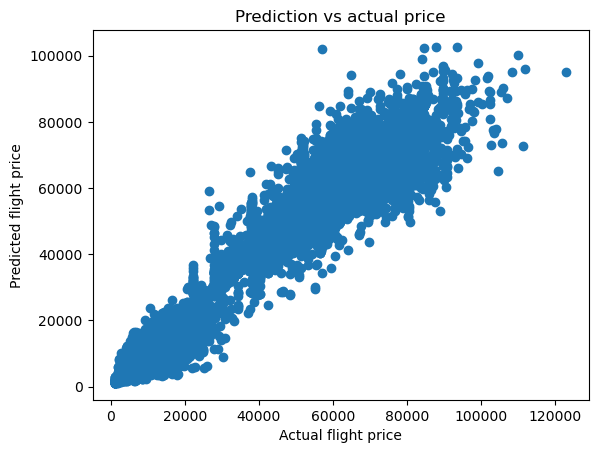

In [20]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual flight price")
plt.ylabel("Predicted flight price")
plt.title("Prediction vs actual price")

In [21]:
df.price.describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

In [23]:
importances = dict(zip(reg.feature_names_in_, reg.feature_importances_))
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)

sorted_importances

[('class', 0.8805306469335534),
 ('duration', 0.057090991768620654),
 ('days_left', 0.018458957325144035),
 ('airline_Air_India', 0.005060275308668686),
 ('airline_Vistara', 0.004771295514777448),
 ('source_city_Delhi', 0.003553536462346855),
 ('destination_Delhi', 0.003205269970949874),
 ('source_city_Mumbai', 0.0021509838476607233),
 ('destination_Mumbai', 0.0019462749745392052),
 ('stops', 0.0018884847669830068),
 ('destination_Kolkata', 0.0017823678201775437),
 ('source_city_Kolkata', 0.0017451334592802385),
 ('arrival_time_Evening', 0.0015798268820301298),
 ('destination_Hyderabad', 0.0015138907629477284),
 ('source_city_Hyderabad', 0.0013705700118882141),
 ('destination_Bangalore', 0.0013249434242538912),
 ('source_city_Bangalore', 0.0011589862087132375),
 ('arrival_time_Night', 0.0011224492522799946),
 ('departure_time_Evening', 0.0010757691832665203),
 ('arrival_time_Afternoon', 0.000980503718676012),
 ('source_city_Chennai', 0.0009763847174674269),
 ('departure_time_Morning', 

In [24]:
from sklearn.model_selection import GridSearchCV

reg = RandomForestRegressor(n_jobs=-1)

param_grid = {
    "n_estimators": [100,200,300],
    "max_depth": [None, 10,20,30],
    "min_samples_split": [2,5,10],
    "min_samples_leaf": [1,2,4],
    "max_features": ['auto', 'sqrt']
}

grid_search = GridSearchCV(reg,param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>